# This project aims at analyzing the T-20 world cup, which is a part of *mentorness* internship program for machine learning
-----------------------------------------------------------------------------
A special thanks for [Mentorness](https://www.linkedin.com/company/mentorness/) for providing this opportunity and experiences that come with it !

The project has been implemented by ``Yaser Alshuaybat`` [LinkedIn](https://www.linkedin.com/in/yaser-alshuaybat-611069268/) [Github](https://github.com/YSKAA423)

## Understanding Cricket and the T-20 World Cup

**Cricket** is a popular sport played between two teams, typically comprising eleven players each. The game involves batting, where players score runs by hitting a ball with a bat, and bowling, where the objective is to dismiss the batsmen by hitting the wickets with the ball or causing them to make mistakes that lead to an out. Matches are played on a circular or oval-shaped field with a rectangular pitch at the center.

**The T-20 World Cup** is an international cricket tournament and one of the sport's most exciting formats, known as Twenty20 (T20). Each team plays a single innings, batting for a maximum of 20 overs (120 legal balls), making the game fast-paced and spectator-friendly. The T-20 World Cup features teams from various countries competing to win the global title, celebrated for its high-energy matches and massive fan following.


## Problem Statement:
The T-20 World Cup 2022 dataset provides a goldmine of cricket data, including detailed match
statistics, player performances, and game-changing events. Your mission is to unravel the stories hidden
within this dataset by:
>1. Data Exploration: Delve into the dataset to uncover trends, patterns, and insights. Analyze the
performance of teams, players, and key events within the matches.

>2. In-Depth Analysis: Examine player statistics, including runs, wickets, and over-by-over progress, to understand the dynamics of the game.

>3. Event Inference: Identify and analyze critical match events, such as boundaries, wickets, and strategic moments. Uncover the factors that contribute to the success or downfall of a team.

>4. Performance Evaluation: Evaluate individual and team performances, including standout
players, consistent run-scorers, and top wicket-takers. Discover what sets them apart.

>5. Statistical Insights: Utilize statistical techniques to gain insights into team strategies, batting, bowling, and match outcomes. Create visualizations that convey the story of the tournament.

Dataset Overview:
The dataset contains detailed information on T-20 World Cup 2022 matches. It includes:
- Match details: Match ID, names of the home and away teams, innings details, over-by-over progress.
- Player statistics: Runs, wickets, and other player-specific details.
- Match events: Boundaries, wickets, retired hurt scenarios, and more.
- Commentary text: Pre-match, in-match, and post-match commentary snippets.

## Key Variables in the T-20 World Cup 2022 Dataset

### Match Details
- **Match ID**: A unique identifier for each match, useful for referencing specific games.
- **Home and Away Teams**: The names of the teams playing, with one designated as the 'home' team (usually based on the country or venue) and the other as 'away'.
- **Innings Details**: Information about which team is batting and in which inning of the match.
- **Over-by-Over Progress**: Breakdown of the match into overs; an over consists of six legal deliveries bowled by a bowler.

### Player Statistics
- **Runs**: The number of runs scored by a batsman. Runs are the primary means by which games are scored and winners determined.
- **Wickets**: This refers to the dismissal of a batsman, which occurs in various ways such as being bowled, caught, or run out. Wickets are critical for the bowling team to halt the scoring progress of the batting team.

### Match Events
- **Boundaries**: This includes both 'fours' (when the ball reaches the boundary after touching the ground) and 'sixes' (when the ball crosses the boundary without touching the ground). Boundaries are high-scoring events.
- **Retired Hurt**: A scenario where a batsman leaves the field due to an injury but can return later to resume batting.

### Commentary Text
- **Pre-match, In-match, and Post-match Commentary**: These snippets provide context, describe the unfolding events, and analyze the game. Commentary helps viewers understand the dynamics and significant moments of the match.

------------------------------------------------------
<div style="background-color: #e0f0ff; padding: 10px; border-left: 5px solid #009fdf;">
<strong>The dataset:</strong> Each observation in this dataset is a comment made during games, while this project is Data Science Centric, it could be reinforced later on to viewed under a Natural Language Processing light.
</div>


### This project will encompass different and simple parts.

1- Data Preparation

2- Eploratory Data Analysis
> Exploring Individual Variables
> Exploring Multiple Variables groupings
> Visualizing Insights

3- Convey Key Findings

## This project will explore:
- Matches that occured during the world cup and the percentages of home/away games
- Performance Analysis
     >The distrubution of runs
     
     >The play progression across different overs
     
     >Bowlers Performance (Wickets and Runs)
     
     >Batsmen Performance (Runs, Balls faced, and Strike Rate)
     
     >Powerplay Performance Analysis (Total Runs)
     
     >Death Overs Performance Analysis (Total Runs)
     
     >Mann-Whitney U Test for Powerplay vs. Death Overs Performance Hypotheses test
     
--------------------------------------


## Data Preparation 

In [1]:
# importing relavent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# reading the csv file
t20 = pd.read_csv("T-20 World cup 2022.csv")

In [3]:
# Showcasing basic information of the dataset
t20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

#### All variables have been assigned the types that have been expected

In [4]:
# Total amount of comments
print(f"{len(t20)} comments")

9814 comments


In [5]:
# Inspecting the first few rows
t20.head()

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN


In [6]:
# cheking duplicates
t20.duplicated().any()

True

In [7]:
# removing duplicates
t20.drop_duplicates(inplace = True)

In [8]:
# Total amount of comments (after removal)
print(f"{len(t20)} comments")

9813 comments


In [9]:
# checking null values 
nulled = t20.isna().any()
not_nulled = nulled[nulled == False]
nulled[nulled == True]

bowler2_id           True
bowler2_name         True
bowler2_overs        True
bowler2_maidens      True
bowler2_runs         True
bowler2_wkts         True
wicket_id            True
wkt_batsman_name     True
wkt_bowler_name      True
wkt_batsman_runs     True
wkt_batsman_balls    True
wkt_text             True
text                 True
preText              True
postText             True
dtype: bool

In [10]:
# How many null values 
null_num = t20.isna().sum()
null_num[null_num>0]

bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9262
wkt_batsman_name     9262
wkt_bowler_name      9262
wkt_batsman_runs     9262
wkt_batsman_balls    9262
wkt_text             9262
text                   28
preText              7953
postText             8725
dtype: int64

In [11]:
has_null = t20[nulled.index]
doesnt_have_null = t20[not_nulled.index]

In [12]:
has_null.head(20)

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN
5,160,1298179,ENG v PAK,PAK,ENG,PAK,1,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full outside off, and that's <strong>nervy run...",NaN,NaN
6,170,1298179,ENG v PAK,PAK,ENG,PAK,1,1,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball outside off, swinging away a littl...",NaN,NaN
7,180,1298179,ENG v PAK,PAK,ENG,PAK,1,1,6,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, a hint of width, and Babar rolls his...",NaN,NaN
8,11020,1298179,ENG v PAK,PAK,ENG,PAK,1,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,there's the Babar cover drive. Half-volley clo...,NaN,NaN
9,11010,1298179,ENG v PAK,PAK,ENG,PAK,1,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"looks for outswing from a leg-stumpish line, b...","<p>An eventful start, but no damage yet, in ei...",NaN


In [13]:
doesnt_have_null.head()

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,bowler1_name,bowler1_overs,bowler1_maidens,bowler1_runs,bowler1_wkts,batsman2_id,batsman2_name,batsman2_runs,batsman2_balls,isRetiredHurt
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,Ben Stokes,0.1,0,2,0,348144,Babar Azam,0,0,False
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,Ben Stokes,0.0,0,2,0,348144,Babar Azam,0,0,False
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,Ben Stokes,0.0,0,1,0,348144,Babar Azam,0,0,False
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,Ben Stokes,0.2,0,4,0,348144,Babar Azam,0,0,False
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,Ben Stokes,0.3,0,4,0,348144,Babar Azam,0,0,False


In [14]:
# fill null values
t20.fillna({
    'bowler2_id': 0, 'bowler2_name': 'No Bowler', 'bowler2_overs': 0, 'bowler2_maidens': 0,
    'bowler2_runs': 0, 'bowler2_wkts': 0, 'wicket_id': 0, 'wkt_batsman_name': 'No Wicket',
    'wkt_bowler_name': 'No Bowler', 'wkt_batsman_runs': 0, 'wkt_batsman_balls': 0, 'wkt_text': 'No Wicket'
}, inplace=True)

### Null Handling

#### Basic Approach:
- **Strategy**: Filled null values with generic placeholders like 'No Bowler', 'No Wicket', etc., using `fillna()` method.
- **Purpose**: Ensured analysis could proceed without errors due to missing data in critical columns.

#### Future Enhancements:
1. **Contextual Filling**: Fill null values based on contextual information or average performance.
2. **Data Imputation**: Explore advanced techniques like mean/median imputation, predictive modeling, or interpolation.
3. **Missing Data Analysis**: Investigate systematic reasons for missing values and explore correlations with other variables.
4. **Dynamic Handling**: Implement approaches tailored to specific analyses and data requirements.
5. **Data Quality Checks**: Incorporate rigorous checks for inconsistencies, outliers, or unexpected patterns in the data.

Implementing these enhancements can improve analysis accuracy and reliability, leading to more robust insights and recommendations for cricket stakeholders.

------------------------------------------------

# EDA 

``What were the matches that occured during the world cup?``

In [15]:
t20.match_name.unique()

array(['ENG v PAK', 'ENG v INDIA', 'NZ v PAK', 'INDIA v ZIM', 'BAN v PAK',
       'NED v SA', 'ENG v SL', 'AUS v AFG', 'IRE v NZ', 'PAK v SA',
       'BAN v INDIA', 'NED v ZIM', 'ENG v NZ', 'AFG v SL', 'AUS v IRE',
       'INDIA v SA', 'NED v PAK', 'BAN v ZIM', 'NZ v SL', 'PAK v ZIM',
       'INDIA v NED', 'BAN v SA', 'ENG v IRE', 'AUS v SL', 'SA v ZIM',
       'BAN v NED', 'INDIA v PAK', 'IRE v SL', 'AFG v ENG', 'AUS v NZ',
       'SCOT v ZIM', 'IRE v WI', 'NAM v UAE', 'NED v SL', 'WI v ZIM',
       'IRE v SCOT', 'SL v UAE', 'NAM v NED', 'IRE v ZIM', 'SCOT v WI',
       'NED v UAE', 'NAM v SL'], dtype=object)

In [16]:
matches = t20.match_name.nunique()
print(f"{matches} matches played")

42 matches played


### Home and Away teams analysis

In [17]:
unique_matches = t20.drop_duplicates(subset='match_name')
home = unique_matches.home_team.value_counts()
away = unique_matches.away_team.value_counts()
top3_h = home.iloc[[0,1,2]]
top3_a = away.iloc[[0,1,2]]
home

home_team
INDIA    5
NZ       4
SL       4
ZIM      4
PAK      3
BAN      3
SCOT     3
NED      2
AUS      2
AFG      2
IRE      2
WI       2
UAE      2
NAM      2
ENG      1
SA       1
Name: count, dtype: int64

In [18]:
away

away_team
NED      6
ENG      5
IRE      5
PAK      4
ZIM      4
SA       4
SL       4
BAN      2
AUS      2
AFG      1
NZ       1
INDIA    1
NAM      1
UAE      1
WI       1
Name: count, dtype: int64

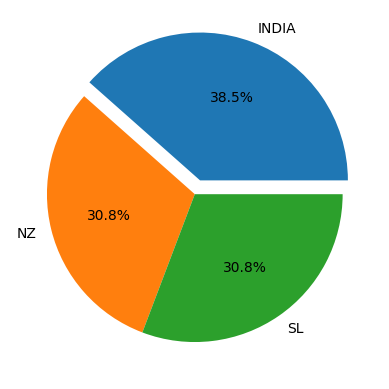

<Figure size 640x480 with 0 Axes>

In [19]:
plt.pie(top3_h,labels = top3_h.index,explode = [0.1,0,0], autopct = "%1.1f%%")
plt.show()
plt.clf()

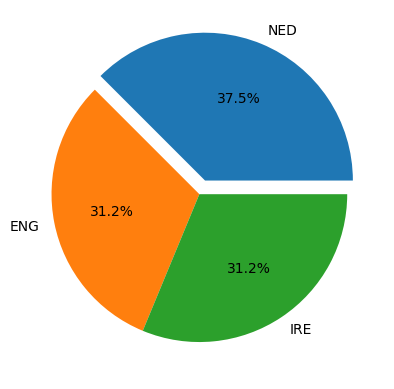

<Figure size 640x480 with 0 Axes>

In [20]:
plt.pie(top3_a,labels = top3_a.index,explode = [0.1,0,0], autopct = "%1.1f%%")
plt.show()
plt.clf()

#### India hosted the most home games mounting to 38.5% of the countries that played host, on the other hand Netherlands played as the visitor the most with 37.5% out of the visiting teams.

#### Sirilanka, Newzeland and Zimbabwi have played as the host equally the same with 4 games in total, while Ireland and England played 5 games as visitors. 
-----------------------------------------

## Performance Analysis

### Peaking at the distribution of runs 

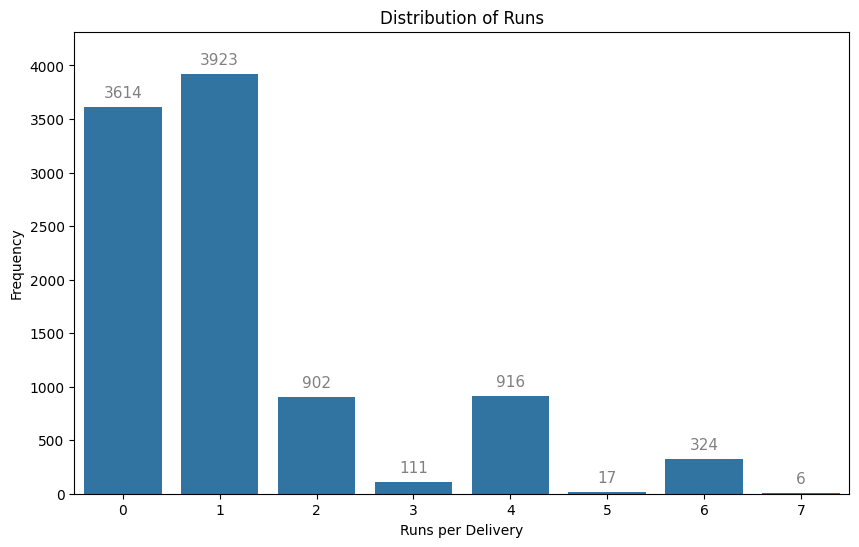

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='runs', data=t20)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
                textcoords='offset points')

plt.title('Distribution of Runs')
plt.xlabel('Runs per Delivery')
plt.ylabel('Frequency')
plt.ylim(0, max(t20['runs'].value_counts()) * 1.1)  # annotation space
plt.show()

#### The figure clearly illustrates that single runs are the most frequent scoring event, indicating that players often manage to score one run per delivery more than any other number of runs. This suggests a conservative batting strategy or effective fielding that restricts higher scoring.
-------------------------------------------------

### How does the play progress across overs?

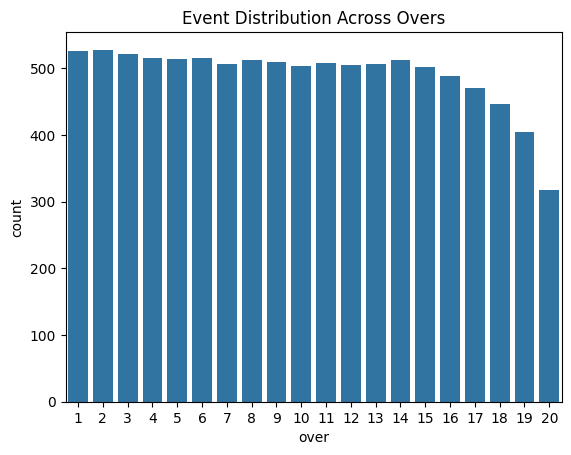

In [22]:
sns.countplot(x='over', data=t20)
plt.title('Event Distribution Across Overs')
plt.show()


#### Initial Overs: The high frequency of events during the powerplay (first 6 overs) underscores aggressive batting strategies exploiting fewer field restrictions, aimed at maximizing runs but increasing wickets due to higher risk.

#### Middle Overs: A gradual decrease in events indicates a shift towards consolidating the innings, with teams focusing on steady run accumulation while minimizing risky plays.

#### Late Overs: The significant decline in events towards the end highlights the dual impact of high-risk strategies—leading to either rapid run accumulation or quick dismissals—and potential early innings closures.

#### Strategic Implications: Optimizing powerplay performance, managing the middle overs for steady scoring, and preparing for the death overs are crucial for leveraging the observed patterns to enhance match outcomes.

### Bowlers' Performance (Wickets and Runs)

                            bowler1_wkts  bowler1_runs
bowler1_name                                          
Blessing Muzarabani                  157          2286
Arshdeep Singh                       154          1692
Paul van Meekeren                    148          2384
Maheesh Theekshana                   121          2175
Wanindu Hasaranga de Silva           121          2226
Taskin Ahmed                         118          1102
Sam Curran                           118          1722
Anrich Nortje                        117           993
Shaheen Shah Afridi                  115          1739
Lungi Ngidi                          109          1118


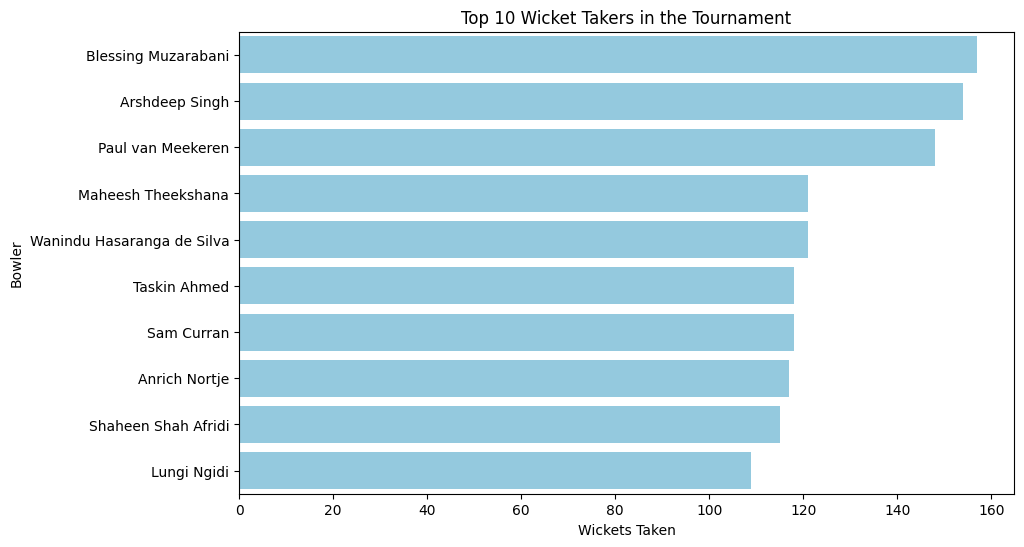

In [23]:
top_wicket_takers = t20.groupby('bowler1_name').agg({
    'bowler1_wkts': 'sum',
    'bowler1_runs': 'sum'
}).sort_values(by='bowler1_wkts', ascending=False).head(10)
print(top_wicket_takers)

# Visualizing top wicket takers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_wicket_takers['bowler1_wkts'], y=top_wicket_takers.index,  color='skyblue')
plt.title('Top 10 Wicket Takers in the Tournament')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.show()

### Batsmen Performance (Runs, Balls faced, and Strike Rate)

                       Total Runs  Balls Faced  Strike Rate
batsman1_name                                              
Virat Kohli                  5615         4792   117.174457
Pathum Nissanka              5094         4356   116.942149
Max O'Dowd                   4474         4096   109.228516
Glenn Phillips               4408         2965   148.667791
Jos Buttler                  4326         3062   141.280209
Alex Hales                   4174         2655   157.212806
Sikandar Raza                3726         2308   161.438475
Najmul Hossain Shanto        3643         3370   108.100890
George Munsey                3472         2947   117.814727
Devon Conway                 3456         2713   127.386657
                     Total Runs  Balls Faced  Strike Rate
batsman1_name                                            
Lungi Ngidi                   4            1   400.000000
Mustafizur Rahman            21            8   262.500000
Haris Rauf                   23           10   2

C:\Users\yasee\AppData\Local\Temp\ipykernel_18320\4172143048.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_performers_by_runs['Total Runs'], y=top_performers_by_runs.index,palette='viridis')


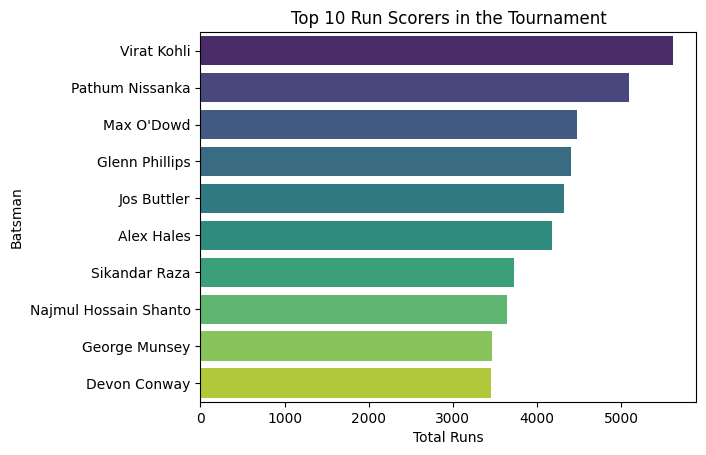

C:\Users\yasee\AppData\Local\Temp\ipykernel_18320\4172143048.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_performers_by_strike_rate['Strike Rate'], y=top_performers_by_strike_rate.index,palette='viridis')


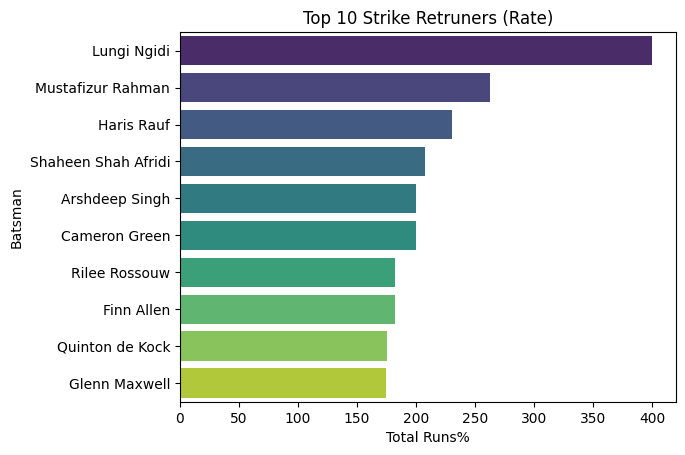

<Figure size 640x480 with 0 Axes>

In [24]:
batsman_performance = t20.groupby('batsman1_name').agg({
    'batsman1_runs': 'sum',
    'batsman1_balls': 'sum'
}).rename(columns={'batsman1_runs': 'Total Runs', 'batsman1_balls': 'Balls Faced'})

# Adding the strike rate column
batsman_performance['Strike Rate'] = (batsman_performance['Total Runs'] / batsman_performance['Balls Faced']) * 100

# Displaying top performers by runs and strike rate
top_performers_by_runs = batsman_performance.sort_values(by='Total Runs', ascending=False).head(10)
top_performers_by_strike_rate = batsman_performance.sort_values(by='Strike Rate', ascending=False).head(10)

print(top_performers_by_runs)
print(top_performers_by_strike_rate)

sns.barplot(x=top_performers_by_runs['Total Runs'], y=top_performers_by_runs.index,palette='viridis')
plt.title('Top 10 Run Scorers in the Tournament')
plt.xlabel('Total Runs')
plt.ylabel("Batsman")
plt.show()
plt.clf()

sns.barplot(x=top_performers_by_strike_rate['Strike Rate'], y=top_performers_by_strike_rate.index,palette='viridis')
plt.title('Top 10 Strike Retruners (Rate)')
plt.xlabel('Total Runs%')
plt.ylabel("Batsman")
plt.show()
plt.clf()

### ``Blessing Muzarabani`` was the player with most wickets throughout the entire world cup with **157** wickets. 
### ``Virat Kohli`` was the highest run scorer across all games with **5615** runs.
### ``Lungi Ngidi`` had the highest Strike Rate with **400** %.

### Powerplay Performance Analysis (Runs)
> Examine the performance during the powerplays (the first 6 overs of an innings in T-20 cricket).

count     42.000000
mean      82.261905
std       16.695347
min       49.000000
25%       73.000000
50%       80.000000
75%       92.750000
max      124.000000
Name: runs, dtype: float64


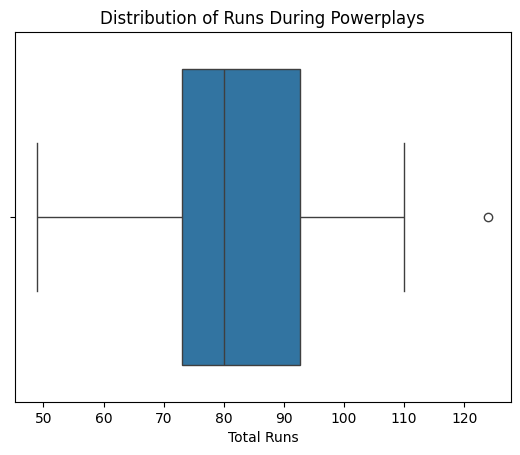

In [25]:
# Filtering to the powerplay overs
powerplay_data = t20[t20['over'].between(1, 6)]
powerplay_runs = powerplay_data.groupby('match_id')['runs'].sum().reset_index()
powerplay_run_stats = powerplay_runs['runs'].describe()
print(powerplay_run_stats)

sns.boxplot(data=powerplay_runs, x='runs')
plt.title('Distribution of Runs During Powerplays')
plt.xlabel('Total Runs')
plt.show()

### Death Overs Performance Analysis (Runs)
>  Evaluate how teams handle the final overs of the innings (overs 17 to 20).

count    41.000000
mean     55.219512
std      19.254236
min      20.000000
25%      41.000000
50%      55.000000
75%      71.000000
max      95.000000
Name: runs, dtype: float64


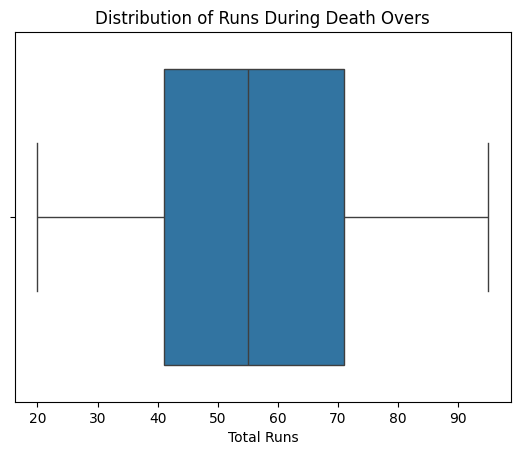

In [26]:
# Filtering data for death overs (17 to 20)
death_overs_data = t20[t20['over'].between(17, 20)]

# Calculating total runs and wickets in death overs by match
death_overs_runs = death_overs_data.groupby('match_id')['runs'].sum().reset_index()
death_overs_run_stats = death_overs_runs['runs'].describe()
print(death_overs_run_stats)

sns.boxplot(data=death_overs_runs, x='runs')
plt.title('Distribution of Runs During Death Overs')
plt.xlabel('Total Runs')
plt.show()

### Future Analysis
<div style="background-color: #e0f0ff; padding: 10px; border-left: 5px solid #009fdf;">
<strong>Note:</strong> This foundational analysis on total runs sets the stage for future expansions to include additional metrics such as wicket rates and bowling efficiencies, enhancing insights into team strategies and player impacts.
</div>

### Interpretation of Results

A clear difference in total runs is apparent the median amount of total runs is clearly higher during powerplays, while a drop of runs is observed during death overs. In addition, an outlier value harnessing over 120 runs have been achieved by a team throughout the powerplays which is exceptional.

The analysis of total runs scored during powerplays and death overs illuminates the effectiveness of team strategies in exploiting critical phases. These findings underscore the importance of optimizing scoring opportunities to secure competitive advantages in high-pressure situations.

------------------------------------


``Statistical Analysis``: Mann-Whitney U Test for Powerplay vs. Death Overs Performance
Hypotheses

``Null Hypothesis`` (H0): There is no difference in the median runs scored during the powerplay overs and the death overs.

``Alternative Hypothesis`` (H1): There is a difference in the median runs scored during the powerplay overs and the death overs.

In [27]:
# Calculate the Mann-Whitney U test
stat, p_value = stats.mannwhitneyu(powerplay_runs['runs'], death_overs_runs['runs'])

# Interpret the results (Semi-dynamic)
alpha = 0.05  # significance threshold
if p_value < alpha:
    conclusion = 'reject the null hypothesis (significant difference).'
else:
    conclusion = 'do not reject the null hypothesis (no significant difference).'

print(f"U-statistic: {stat}, P-value: {p_value}")
print(f"Based on the p-value, we {conclusion}")


U-statistic: 1467.5, P-value: 3.366628002907106e-08
Based on the p-value, we reject the null hypothesis (significant difference).


#### Results:
The Mann-Whitney U test, a non-parametric test ideal for comparing two independent samples without assuming a normal distribution, was conducted. The resulting p-value provides the probability of observing the data if the null hypothesis were true.

- **U-statistic:** 1467.5
- **P-value:** 3.366628002907106e-08

Based on the p-value, which is less than the chosen significance level of 0.05, we **reject the null hypothesis**, suggesting a significant difference in run distribution between the two phases. This finding indicates that powerplay and death overs have statistically different impacts on the game's scoring, highlighting the importance of tailored strategies for these critical game phases.


----------------------------------------
## Summary of Findings

The detailed analysis conducted on the T-20 World Cup data revealed several critical insights:

- **Match Exploration:** Observing the matches played during the world cup and the home/away game percentages for each country.
  
- **Distribution of runs:** Analysis of how the amount of runs made are distributed. Having a single run has proven to be the most frequent.
  
- **Event Distribution:** Analysis of how event frequencies change throughout the match gives insights into team tactics and their adaptability under varying match conditions. A decreasing trend is noticed overall, meaning that the amount of events drop going through the matches, which is understandable due to fatigue.

- **Top Performers:** Identification of key performers in batting and bowling showcases individual contributions and provides a basis for strategic team selection and game planning.
  
- **Powerplay vs. Death Overs:** The statistical test confirmed a significant difference in the runs scored during the powerplay compared to the death overs, highlighting different batting strategies or bowler effectiveness that are crucial for team strategies.



These findings provide a granular understanding of match dynamics and player performances, offering valuable insights for teams and coaches.

## Conclusion

This project demonstrates the powerful application of data analytics in sports, particularly in understanding the dynamic nature of T-20 cricket. Through comprehensive data analysis and statistical testing, the project not only enhances our understanding of critical match phases but also underscores the importance of data-driven decision-making in sports strategy and player performance improvement.

By uncovering nuanced insights into batting and bowling strategies during different phases of the game, the analysis informs better coaching strategies and player training programs. The statistical validation of observed patterns through the Mann-Whitney U test reinforces the findings, providing a solid foundation for future analytical endeavors.

The project sets a precedent for future research, suggesting areas such as predictive modeling of match outcomes and player performance predictions based on in-game statistics. This approach not only broadens the scope of sports analytics but also enhances tactical planning and strategic decision-making in cricket.

### Future Work

Moving forward, this project lays the groundwork for the incorporation of machine learning models to predict match outcomes and player performances, potentially transforming strategic planning and decision-making processes in cricket. The integration of predictive analytics could further augment the capability of sports organizations to harness data for competitive advantage.
